# <center>Fuzzy Clustering</center>
## <center>Inclass Project 1 - MA4144</center>

This project contains 9 tasks/questions to be completed, some require written answers. Open markdow cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

Use this cell to use any include any imports

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Q1.** In the following cell load the data (in the file SMDataRefined.csv) to a pandas dataframe, and display the data. Then get the data into a numpy matrix $X$, each row corresponding to a datapoint and each column to a feature, in our case whether a certain token exists ($1$) or not ($0$). Let us denote the number of rows of $X$ by $N$ and the number of columns by $M$.

**About the dataset**: Each row in the dataset refers to a social media post. The first column refers to the number of likes received by each post (standardized between to the interval $[0, 1]$), the columns after that will denote the presence of a certain word (token) in the text of the post. For example, a $1$ in the column "TextToken_life" denotes that the particular post contained the word "life" in it and $0$ otherwise. These will be the features of our dataset. Our aim is to cluster these social media posts based on number of likes and words contained in it.

In [116]:
file_path = 'SMDataRefined.csv'
df = pd.read_csv(file_path)

# Display pandas data
print(df.head())

matrix = df.to_numpy()

N, M = matrix.shape

# print(matrix)

print(f'Number of rows (N): {N}')
print(f'Number of columns (M): {M}')

      Likes  TextToken_life  TextToken_joy  TextToken_night  TextToken_heart  \
0  0.285714               0              0                0                0   
1  0.000000               0              0                0                0   
2  0.428571               0              0                0                0   
3  0.071429               0              0                0                0   
4  0.214286               0              0                0                0   

   TextToken_laughter  TextToken_dreams  TextToken_feeling  TextToken_day  \
0                   0                 0                  0              1   
1                   0                 0                  0              0   
2                   0                 0                  0              0   
3                   0                 0                  0              0   
4                   0                 0                  0              0   

   TextToken_like  TextToken_new  
0               0    

**Q2.** In the following cell create a new function named $\textrm{initMu}$, that takes in two parameters $\textrm{npoints}$ and $\textrm{nclusters}$ and outputs the membership matrix for $\textrm{npoints}$ number of data points and $\textrm{nclusters}$ number of clusters. Recall from the lecture that the membership matrix $U$ of dimension $N \times c$ has the following properties.

1. $0 \leq u_{ij} \leq 1$
2. $\sum\limits_{j = 1}^{c}u_{ij} = 1$ for all $i = 1,2, \cdots, N$

You can do a random initialization. Here $\textrm{npoints} = N$ and $\textrm{nclusters} = c$.

In [117]:
def initMu(npoints, nclusters):

    #making matrix with random initialization
    U = np.random.rand(npoints, nclusters)
    
    U = U / U.sum(axis=1, keepdims=True)

    return U

x = initMu(732,11)

**Q3.** In the following cell create a function named $\textrm{calculateCenters}$ that computes and returns centers $v_j$, $j = 1, 2, \cdots, c$ (as $c \times M$ matrix) given the data matrix $X$ and the membership matrix $U$. Recall the following update formula for $v_j$ from the lectures.

$v_j = \frac{\sum\limits_{i = 1}^N {\left( \frac{u_{ij}}{u_{max}} \right)}^{m_1} x_i}{\sum\limits_{i = 1}^N {\left( \frac{u_{ij}}{u_{max}} \right)}^{m_1}}$

Here $u_{max} = max \left(u_{1j}, u_{2j}, \cdots, u_{Nj} \right)$ and $m_1 \in [1, \infty)$ is a hyperparameter we discussed in class, and will be passed in as a parameter to the function.

The most efficient way to do this computation is by matrix multiplications. Try to find the appropriate matrix multiplication. You may need to transpose certain matrices.

In [118]:
def calculateCenters(X, U, m1):
    
    # Number of clusters
    K = U.shape[1]
    
    # Initialize the centers matrix
    V = np.zeros((K, X.shape[1]))
    
    # Compute the cluster centers
    for j in range(K):
        # Maximum membership value for the j-th cluster
        u_max = np.max(U[:, j])
        
        # Calculate the weighted memberships
        weighted_memberships = (U[:, j] / u_max) ** m1
        
        # Calculate the numerator (weighted sum of data points)
        numerator = np.dot(weighted_memberships, X)
        
        # Calculate the denominator (sum of weighted memberships)
        denominator = np.sum(weighted_memberships)
        
        # Calculate the center v_j
        V[j] = numerator / denominator
    
    return V

central = calculateCenters(matrix,x,2)
print(central)

[[0.46991187 0.0226551  0.02926773 0.02856551 0.02916111 0.03214598
  0.02933691 0.0133994  0.03404247 0.02114084 0.05823973]
 [0.47873625 0.03059763 0.03368207 0.02668791 0.03023519 0.01985628
  0.03451521 0.01177019 0.03723079 0.03785321 0.06078052]
 [0.46785064 0.03890541 0.0217524  0.02673674 0.02604524 0.02543497
  0.03561145 0.01517007 0.03395869 0.0365306  0.06016027]
 [0.4668054  0.0368744  0.02488055 0.03176975 0.05980674 0.02446444
  0.05015708 0.01745289 0.03524818 0.04485237 0.03744202]
 [0.47336505 0.01837219 0.03238192 0.0346193  0.04196851 0.0338377
  0.04088114 0.01454079 0.04369858 0.03670448 0.05628554]
 [0.4634275  0.03015662 0.03311266 0.03281925 0.02689942 0.03424421
  0.03529476 0.01474658 0.03105561 0.03424304 0.04253871]
 [0.4670573  0.02529447 0.03721445 0.03396118 0.03948496 0.0401615
  0.02642006 0.00727745 0.04018947 0.03192366 0.06606363]
 [0.47940423 0.02457136 0.03869355 0.02408738 0.02249148 0.03022712
  0.03353175 0.01687912 0.03436932 0.03604084 0.0501

**Q4.** In the following cell create a function named $\textrm{updateMu}$ that updates the membership matrix $U$ given the data matrix $X$ and the $\textrm{centers}$. Recall the following update formula for $u_{ij}$ from the lectures.

$u_{ij} = {\left[ \sum\limits_{l = 1}^c { \left( \frac{d_{ij}}{d_{il}} \right)}^{\frac{2}{m_2 - 1}} \right]}^{-1}$
where $d_{ij}$ is the distance between the $i$th data point and the $j$th cluster center. $m_2 \in (1, \infty)$ is another hyperparameter that is passed into the function.

To compute distances sklearn.metrics.pairwise.pairwise_distances could be useful. For these computations, try to avoid for loops as much as possible and use the tools offered by numpy for matrix manipulations for example such as numpy.tile.

The function should finally return the updated $U$ matrix.

In [119]:
from sklearn import metrics

In [120]:
def updateMu(X, centers, m2):
    
    distances = metrics.pairwise.pairwise_distances(X, centers, metric='euclidean')
    
    # Initialize the membership matrix U
    N, K = distances.shape
    U = np.zeros((N, K))
    
    # Update each membership value u_ij
    for i in range(N):
        for j in range(K):
            # Calculate the denominator
            denominator = np.sum((distances[i, j] / distances[i, :]) ** (2 / (m2 - 1)))
            
            # Update the membership value u_ij
            U[i, j] = 1 / denominator
    
    return U


**Q5.** Use following cell to create a function called $\textrm{fuzzyClustering}$ that takes in a data matrix $X$ the number of clusters $\textrm{nclusters}$, $m_1$, $m_2$ hyperparameters and then returns a membership matrix $U$ and nclusters number of centers for each cluster as a matrix whose rows will correspond to the centers. Recall that the fuzzy clustering algorithm,

1. Initialize the membership matrix $U$
Repeat the following steps while max iterations (maxIter) reached or change in norm of $U$ is greater than a specified tolerance (tol).
2. Compute cluster centers
3. Update membership matrix

The function you create should be able to compute the norm between the $U$ matrices from consecutive iterations and plot a graph depicting the variation of the change in norm of $U$ against the number of iterations. 

In [130]:
def fuzzyClustering(X, m1, m2, nclusters, maxiter = 50, tol = 10**(-5)):
    N, M = X.shape
    
    # Step 1: Initialize the membership matrix U
    U = initMu(N, nclusters)
    
    # To track the change in norm of U
    norm_diff = []
    
    for iteration in range(maxiter):
        # Step 2: Compute cluster centers
        centers = calculateCenters(X, U, m1)
        
        # Step 3: Update the membership matrix
        U_new = updateMu(X, centers, m2)
        
        # Calculate the norm of the difference between consecutive U matrices
        norm = np.linalg.norm(U_new - U)
        norm_diff.append(norm)
        
        # Check for convergence (if the change in norm is less than the tolerance)
        if norm < tol:
            print(f"Converged in {iteration + 1} iterations.")
            break
        
        # Update U
        U = U_new
    

    
    return U, centers , norm_diff

**Q6.** Run the fuzzyClasssification algorithm with different hyperparameters $m_1, m_2, \textrm{nclusters}$, note the plot of $U$-norm difference against the number of iterations. <font color='blue'>What can you say about it?</font>

Now lets use the fuzzy membership to find some crisp cluster labelling $\textrm{yfuzzy}$ to for each data point. For a given datapoint you'll assign the cluster labelling by looking at which cluster assigns the largest membership value. numpy.argmax function would be useful in this case. Again avoid for loops. 

Running fuzzyClustering with m1=1.5, m2=1.5, n_clusters=2
Converged in 39 iterations.


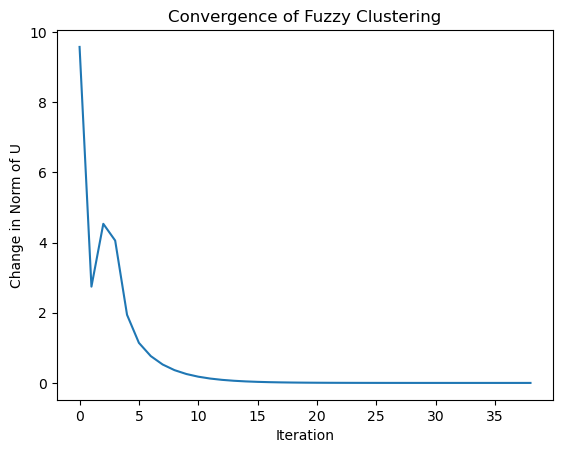

Running fuzzyClustering with m1=1.5, m2=1.5, n_clusters=3
Converged in 46 iterations.


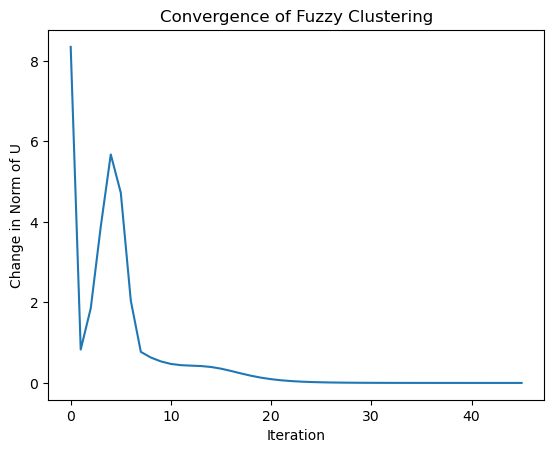

Running fuzzyClustering with m1=1.5, m2=2.0, n_clusters=2


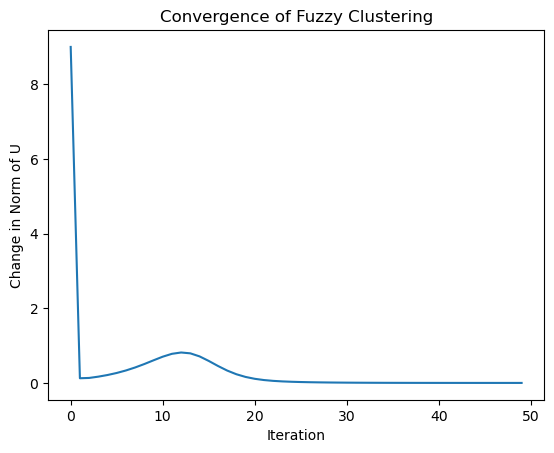

Running fuzzyClustering with m1=1.5, m2=2.0, n_clusters=3


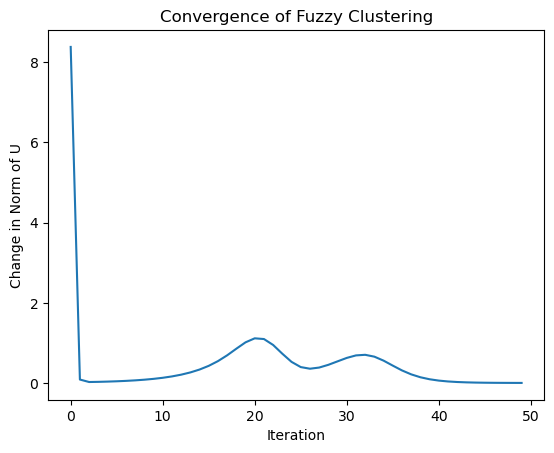

Running fuzzyClustering with m1=2.0, m2=1.5, n_clusters=2
Converged in 38 iterations.


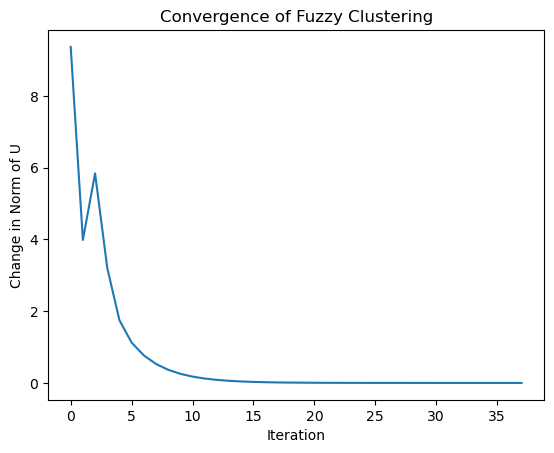

Running fuzzyClustering with m1=2.0, m2=1.5, n_clusters=3
Converged in 40 iterations.


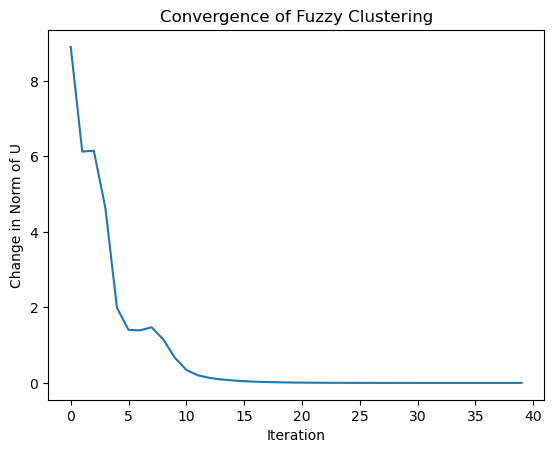

Running fuzzyClustering with m1=2.0, m2=2.0, n_clusters=2
Converged in 36 iterations.


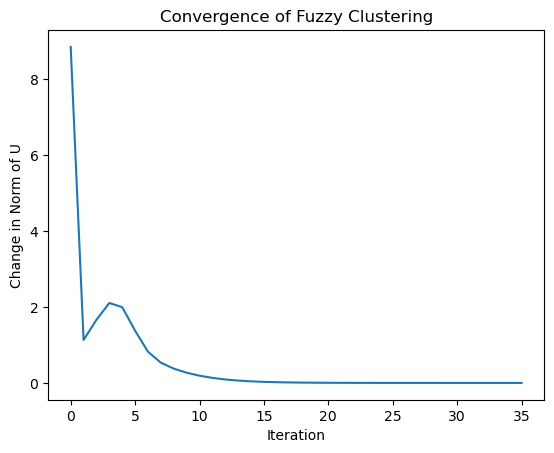

Running fuzzyClustering with m1=2.0, m2=2.0, n_clusters=3


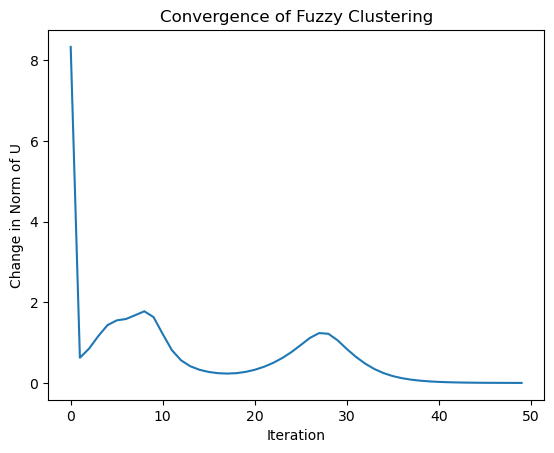

Converged in 48 iterations.
Crisp Cluster Labels for each data point:
 [0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0
 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0
 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1
 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0
 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1
 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1
 0 1 1 1 1 1 1 0 1 1 0 1 0 1 

In [132]:
m1_values = [1.5, 2.0]
m2_values = [1.5, 2.0]
n_clusters_values = [2, 3]

for m1 in m1_values:
    for m2 in m2_values:
        for n_clusters in n_clusters_values:
            print(f"Running fuzzyClustering with m1={m1}, m2={m2}, n_clusters={n_clusters}")
            U_final, centers_final,norm_diff = fuzzyClustering(matrix,m1, m2,n_clusters, tol=10**(-5), maxiter=50)
            y_fuzzy = np.argmax(U_final, axis=1)
            # Plot the norm differences across iterations
            plt.plot(norm_diff)
            plt.xlabel('Iteration')
            plt.ylabel('Change in Norm of U')
            plt.title('Convergence of Fuzzy Clustering')
            plt.show()

#
U_final, centers_final,norm_diff = fuzzyClustering(matrix,2, 2,2, tol=10**(-5), maxiter=50)
y_fuzzy = np.argmax(U_final, axis=1)

# Example output
print("Crisp Cluster Labels for each data point:\n", y_fuzzy)


Q6) What can you say about it?

higher values of m1 and m2 lead to slower convergence, as the norm difference between iterations decreases more gradually.

Lower values of nclusters often result in faster convergence, but the cluster assignments may be less fine-grained.


**Q7.** The Silhoutte score is a measure of how well the clustering has been done, the closer the score to $1.0$ the better the clustering. Refer to sklearn.metrics.silhouette_score. Determine the best choice of hyperparameters $m_1, m_2, \textrm{nclusters}$ through a grid search based on the silhoutte score as the evaluation metric. <font color='blue'>Report the best combination of hyperparameters.</font> For the grid search try $m_1 = 1.0, 1.2, \cdots, 3.0$, $m_2 = 1.2, 1.4, \cdots, 3.0$, $\textrm{nclusters} = 2, 3, \cdots, 15$.

In [156]:
from sklearn.metrics import silhouette_score



best_score = -1
best_params = None


m1_values = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0]
m2_values = [1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0]
n_clusters_values = np.arange(2, 15, 1)

for m1 in m1_values:
    for m2 in m2_values:
        for n_clusters in n_clusters_values:
            U_final, centers_final,norm_diff = fuzzyClustering(matrix,m1, m2,n_clusters, tol=10**(-5), maxiter=50)
            y_fuzzy = np.argmax(U_final, axis=1)
            score = silhouette_score(matrix, y_fuzzy)
            print(f"Silhouette Score: {score}")
            
            # Update best score and parameters
            if score > best_score:
                best_score = score
                best_params = (m1, m2, n_clusters)

# Report best hyperparameters
print(f"Best Silhouette Score: {best_score}")
print(f"Best Parameters: m1={best_params[0]}, m2={best_params[1]}, n_clusters={best_params[2]}")


Converged in 29 iterations.
Silhouette Score: 0.2507022700527657
Silhouette Score: 0.2578464533321331
Silhouette Score: 0.30484511505608053
Silhouette Score: 0.3683535025988153
Silhouette Score: 0.25274292659959485
Converged in 34 iterations.
Silhouette Score: 0.3114712579807909
Silhouette Score: 0.34964987057981844
Converged in 27 iterations.
Silhouette Score: 0.4117372346448458
Converged in 48 iterations.
Silhouette Score: 0.4531774869693209
Converged in 50 iterations.
Silhouette Score: 0.4830924173854366
Silhouette Score: 0.5007714851458634
Converged in 50 iterations.
Silhouette Score: 0.4541042779920973
Converged in 37 iterations.
Silhouette Score: 0.547901220173202
Converged in 39 iterations.
Silhouette Score: 0.24927836775251216
Silhouette Score: 0.24663625219503454
Silhouette Score: 0.35865696891299026
Converged in 42 iterations.
Silhouette Score: 0.389836425426839
Converged in 36 iterations.
Silhouette Score: 0.32772740448373044
Converged in 42 iterations.
Silhouette Score: 0.4

**Q8.** For the best combination of hyperparameters run the following visualization function with different values for $0 \leq f_1 < f_2 < \textrm{nclusters}$. <font color='blue'>What do you see? Explain the purpose of the code and what you would expect through this?</font>

In [166]:
def visualizeClusters2D(X, y, f1, f2):
    colorlist = ['black', 'gray', 'red', 'sienna', 'green', 'blue', 'gold', 'darkorange', 'olive', 'lavendar', 'salmon', 'teal', 'pink', 'magenta', 'tan', 'wheat']

    for i in range(8):
        plt.scatter(X[yfuzzy == i, f1], X[yfuzzy == i, f2], color = colorlist[i])

    plt.show()


Converged in 20 iterations.


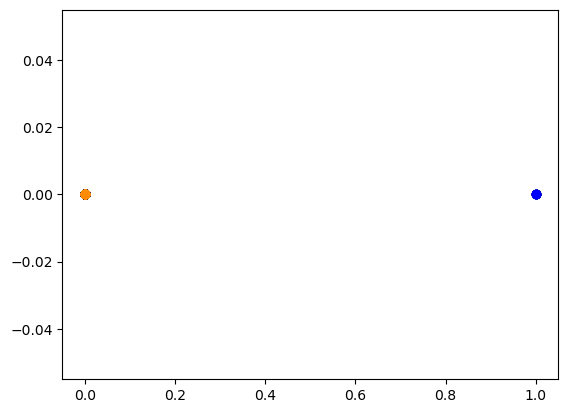

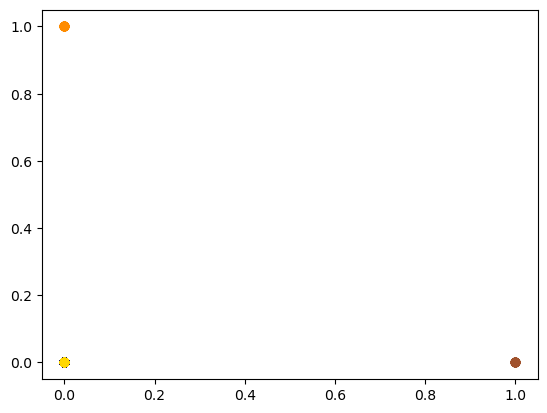

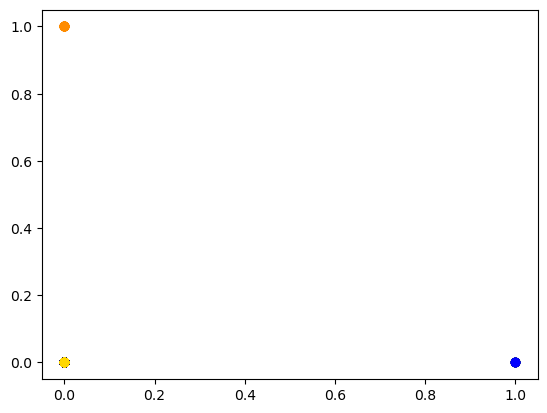

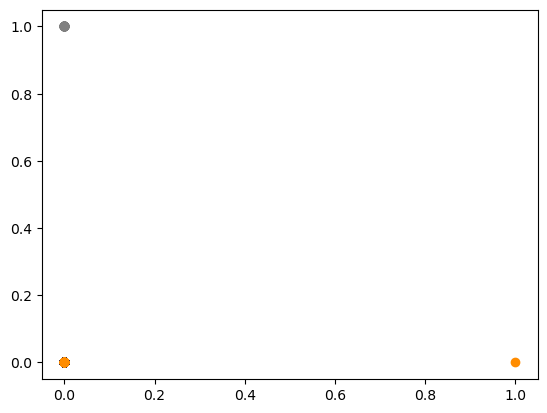

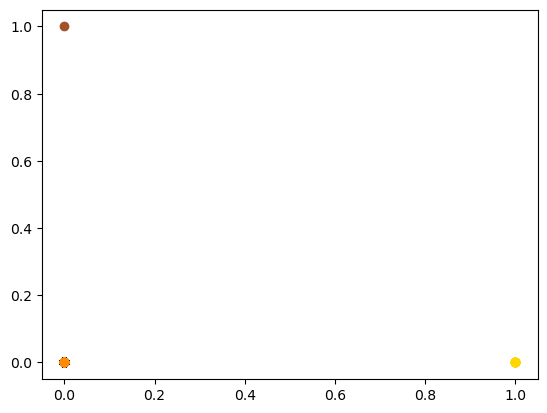

In [168]:
#best combination of hyperparameter
m1 = 2.2
m2 =1.2
nclusters = 15
U, centers_final,norm_diff = fuzzyClustering(matrix, m1, m2, nclusters)
yfuzzy = np.argmax(U, axis=1)

# Try different combinations of features
feature_combinations = [(3,5), (4, 8), (3, 8), (1, 10), (2, 6)]  

for f1, f2 in feature_combinations:
    visualizeClusters2D(matrix, yfuzzy, f1, f2)

The visualizeClusters2D function generates a 2D scatter plot of clustered data based on two chosen features (f1 and f2). The plot uses different colors to represent cluster assignments, allowing for a visual evaluation of how well-separated the clusters are in the 2D space. This helps in understanding the impact of different feature pairs on the clustering outcomes. Clearly defined clusters in the plot indicate strong clustering performance, while overlapping clusters might point to poor separation. By experimenting with different feature combinations, one can determine which pairs are most effective in distinguishing between clusters.

**Q9.** Load (to a pandas dataframe) the actual dataset (SMData.csv) from which the previous dataset was cleaned out. Match each entry in this dataset with the labels you found out through clustering using the best combination of hyperparameters. Go through a few of those clustered entries and notice any patterns (or common sentiment) in the text (the "Text" column of this dataset) of each entry within clusters vs outside the clusters. The label of the $i$th entry in the dataset $= \textrm{yfuzzy}[i]$. <font color='blue'>Explain any observations. Based on your observations, is the clustering successful?</font>

In [169]:
file_path_2 = 'SMData.csv'
df = pd.read_csv(file_path_2) #load data to pandas dataframe

# Add cluster labels to the DataFrame
df['Cluster'] = yfuzzy

# Analyze the text in each cluster
for cluster_num in range(nclusters):
    cluster_texts = df[df['Cluster'] == cluster_num]['Text']
    print(f"Cluster {cluster_num} texts:")
    print(cluster_texts.head())  # Print the first few entries of the cluster
    print("\n")


entry_index = 5
entry_label = df.iloc[entry_index]['Cluster']
entry_text = df.iloc[entry_index]['Text']

print(f"The label of the {entry_index + 1}th entry is: {entry_label}")
print(f"Text of the {entry_index + 1}th entry: {entry_text}")

Cluster 0 texts:
1      Traffic was terrible this morning.           ...
3      Excited about the upcoming weekend getaway!  ...
6      Rainy days call for cozy blankets and hot coc...
11     Feeling a bit under the weather today.       ...
12     Exploring the city's hidden gems.            ...
Name: Text, dtype: object


Cluster 1 texts:
4      Trying out a new recipe for dinner tonight.  ...
7      The new movie release is a must-watch!       ...
10     Just published a new blog post. Check it out!...
13     New year, new fitness goals! 💪               ...
26     Learning a new language for personal growth. ...
Name: Text, dtype: object


Cluster 2 texts:
18     Attending a virtual conference on AI.        ...
33     Feeling inspired after attending a workshop. ...
40     Planning a garden makeover for spring.       ...
54     Heartbroken after hearing the news about a na...
60     Enjoying a quiet evening with a book and some...
Name: Text, dtype: object


Cluster 3 texts:
170     